## Classification Metrics

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import scikitplot as skplt

### Importing Data

In [112]:
train_data_classification = pd.read_csv(r"I:/AV_Hackathon_Codes/GuidedHackathon/Train_eP48B9k.csv")
test_data_classification = pd.read_csv(r"I:/AV_Hackathon_Codes/GuidedHackathon/Test_jPKyvmK.csv")

### Label Encoding

In [113]:
le = LabelEncoder()
for col in train_data_classification:
    if train_data_classification[col].dtype == "object":
        train_data_classification[col] = le.fit_transform(train_data_classification[col])
        test_data_classification[col] = le.fit_transform(test_data_classification[col])

### Dropping Columns with NA's

In [114]:
train_data_classification.drop(['id','customer_age','balance','last_contact_duration','num_contacts_in_campaign','days_since_prev_campaign_contact'],axis=1,inplace=True)
test_data_classification.drop(['id','customer_age','balance','last_contact_duration','num_contacts_in_campaign','days_since_prev_campaign_contact'],axis=1,inplace=True)

### Splitting Data 

In [115]:
y = train_data_classification['term_deposit_subscribed']
X = train_data_classification.drop('term_deposit_subscribed',axis=1)

X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)
print (X_Train.shape)
print (y_Train.shape)
print (X_Test.shape)
print (y_Test.shape)

(23735, 11)
(23735,)
(7912, 11)
(7912,)


### Running RF Model

In [116]:
rf = RandomForestClassifier()
rf.fit(X_Train,y_Train)
predict = rf.predict(X_Test)

### Confusion Matrix

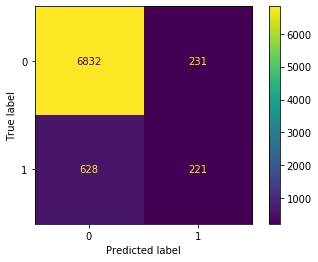

In [117]:
confusion_mat = metrics.confusion_matrix(y_Test,predict)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=rf.classes_)
disp.plot()

### Acuracy Score

In [118]:
# calculating the values of confusion matrix
tn, fp, fn, tp = metrics.confusion_matrix(y_Test, predict).ravel()

# accuracy score using sklearn function
accuracy_using_sklearn = metrics.accuracy_score(y_Test,predict)
print (accuracy_using_sklearn)

# accuracy score using the formula
accuracy_score_using_formula = (tp+tn)/(tp+tn+fp+fn)
print (accuracy_score_using_formula)

0.8914307381193124
0.8914307381193124


### Error / Misclassification Rate

In [119]:
# error rate using the formula 
error_rate_using_formula = (fp+fn)/(tp+tn+fp+fn)
print (error_rate_using_formula)

# error rate using sklearn accuracy score
error_rate_using_sklearn = 1-metrics.accuracy_score(y_Test,predict)
print (error_rate_using_sklearn)

0.10856926188068756
0.1085692618806876


### Sensitivity / True Positive Rate / Recall

In [120]:
# sensitivity using the formula 
sensitivity_using_formula = (tp)/(tp+fn)
print (sensitivity_using_formula)

# sensitivity using sklearn function
sensitivity_using_sklearn = metrics.recall_score(y_Test,predict)
print (sensitivity_using_sklearn)

0.26030624263839813
0.26030624263839813


### False Positive Rate

In [121]:
# False Positive Rate using formula
FPR_using_formula = (fp) / (fp+tn)
print (FPR_using_formula)

0.03270564915758176


### True Negative Rate / Specificity

In [122]:
# specificity using formula
Specificity_using_formula = (tn) / (tn+fp)
print (Specificity_using_formula)

0.9672943508424182


### Precision

In [123]:
# Precision using formula
Precision_using_formula = (tp) / (tp+fp)
print (Precision_using_formula)

# precision using sklearn function
Precision_using_sklearn = metrics.precision_score(y_Test,predict)
print (Precision_using_sklearn)

0.4889380530973451
0.4889380530973451


### F Beta Score / F1 Score

In [124]:
# F Beta Score
F_Beta_Score = metrics.fbeta_score(y_Test,predict,beta=1)
print (F_Beta_Score)

# F1 Score
F1_Score = metrics.f1_score(y_Test,predict)
print (F1_Score)

# Note that F Beta and F1 scores are same because we choose Beta as 1 while calculating F Beta Score.

0.33973866256725593
0.33973866256725593


### Log Loss

In [125]:
# Log Loss
log_loss = metrics.log_loss(y_Test,rf.predict_proba(X_Test)[:,1])
print (log_loss)

0.6962678256177632


### ROC Curve / Area under the ROC curve

Text(0.5, 0, 'False positive rate')

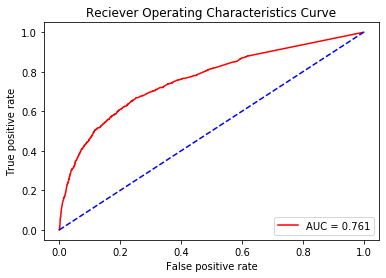

In [126]:
# plotting the ROC curve
frp,trp, threshold = roc_curve(y_Test,rf.predict_proba(X_Test)[:,1])
roc_auc_ = auc(frp,trp)
plt.title('Reciever Operating Characteristics Curve')
plt.plot(frp,trp,'r',label = 'AUC = %0.3f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

### Area under the ROC Curve

In [127]:
# area under roc curve
area_under_roc_curve = metrics.auc(frp,trp)
print (area_under_roc_curve)

0.7612202778059887


## Regression Metrics

### Importing Data 

In [128]:
train_data_regression = pd.read_csv(r"C:/Users/kulka/Downloads/train_v9rqX0R.csv")
test_data_regression = pd.read_csv(r"C:\Users\kulka\Downloads\test_AbJTz2l.csv")

### Label Encoding

In [129]:
le = LabelEncoder()
for col in train_data_regression:
    if train_data_regression[col].dtype == "object":
        train_data_regression[col] = le.fit_transform(train_data_regression[col])
        test_data_regression[col] = le.fit_transform(test_data_regression[col])

### Dropping columns with NA's and ID Variable

In [130]:
train_data_regression.drop(['Item_Weight','Item_Identifier'],axis=1,inplace=True)
test_data_regression.drop(['Item_Weight','Item_Identifier'],axis=1,inplace=True)

### Splitting Data

In [131]:
y = train_data_regression['Item_Outlet_Sales']
X = train_data_regression.drop('Item_Outlet_Sales',axis=1)

X_Trn,X_Tst,y_Trn,y_Tst = train_test_split(X,y,test_size=0.25,random_state=42)
print (X_Trn.shape)
print (y_Trn.shape)
print (X_Tst.shape)
print (y_Tst.shape)

(6392, 9)
(6392,)
(2131, 9)
(2131,)


### Running RF Model

In [132]:
rf = RandomForestRegressor()
rf.fit(X_Trn,y_Trn)
predict = rf.predict(X_Tst)

### Mean Absolute Error

In [133]:
mae = metrics.mean_absolute_error(y_Tst,predict)
print (mae)

765.519449841389


### Mean Squared Error

In [134]:
mse = metrics.mean_squared_error(y_Tst,predict)
print (mse)

1215441.0131967554


### Root Mean Squared Error

In [135]:
rmse = np.sqrt(metrics.mean_squared_error(y_Tst,predict))
print (rmse)

1102.470413751206


### Root Mean Squared Log Error

In [136]:
y_log = np.log1p(train_data_regression['Item_Outlet_Sales'])
X_log = train_data_regression.drop('Item_Outlet_Sales',axis=1)

X_Train,X_Test,y_Train,y_Test = train_test_split(X_log,y_log,test_size=0.25,random_state=42)
print (X_Train.shape)
print (y_Train.shape)
print (X_Test.shape)
print (y_Test.shape)

rf = RandomForestRegressor()
rf.fit(X_Train,y_Train)
predict_log = rf.predict(X_Test)

(6392, 9)
(6392,)
(2131, 9)
(2131,)


In [137]:
rmsle = np.sqrt(metrics.mean_squared_error(y_Test,predict_log))
print (rmsle)

0.547026746219191


### MAPE

In [139]:
mape = metrics.mean_absolute_percentage_error(y_Tst,predict)
print (mape)

0.5840389713269469


### R Squared

In [140]:
r_squared = metrics.r2_score(y_Tst,predict)
print (r_squared)

0.5594595799797204


### Adjusted R Squared

In [147]:
len_dataset = len(X_Tst)
r2 = r_squared
p = len(X_Tst.columns)

In [148]:
adjusted_r_squared = 1 - (((1-r2)*(len_dataset-1))/(len_dataset-p-1))
print (adjusted_r_squared)

0.5575902429782199
